<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>
- Bryan Alfredo Solórzano Montero <br>

Fecha: 13/08/2022

# Importación de librerias necesarias

In [23]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.callbacks import EarlyStopping
import visualkeras

## Cargar y exploración del Dataset

In [174]:
'''Se establece la ruta general de espacio de trabajo'''
os.chdir('C:/Users/Personal/IA/Laboratorio1U3')

In [175]:
'''Se genera una variable con un número para que actúe como aleatorio'''
semilla_aleatoria = 9
'''Se establece la ruta de las imágenes'''
ruta_imagenes = "./Estudiantes_datos_fondoEliminado"
'''Se muestra los directorios (clases) del dataset'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordenan en orden alfabético (AZ - az)'''
nombre_clases.sort()
'''Se muestran las clases del dataset'''
print("Lista de clases = ",nombre_clases,"\nNo. de clases = ", len(nombre_clases))

Lista de clases =  ['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon'] 
No. de clases =  5


In [1]:
def cargar_imagenes_etiquetas(clases):
    """Permite registrar las imagenes y categorías en un arreglo, aplicando transformaciones de color con opencv.

    Argumentos:
        clases (List): Una lista o arreglo de cadenas de texto que identifican a las clases del problema.

    Returna:
        Dos arreglos, uno para contener a las imagenes y otro para sus etiquetas
    """
    '''Arreglo vacío que almacenará las fotos'''
    imagenes = []
    '''Arreglo vacío que almacenará las etiquetas'''
    etiquetas = []
    '''Se crea un bloque que recorrerá cada clase'''
    for iterador, clase in enumerate(clases):
        '''Se crea un bloque que recorrerá cada elemento por clase'''
        for image_name in os.listdir(ruta_imagenes+"/"+clase):
            '''Se almacena la imagen leída mediante opencv'''
            imagen = cv2.imread(ruta_imagenes+"/"+clase+"/"+image_name)
            '''Se modifica el tamaño de la imagen al recomendado por la arquitectura de LeNet'''
            imagen = cv2.resize(imagen, (32,32))
            '''Se establece el formato de color en una escala de grises (blanco y negro'''
            imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
            '''Se añade a la lista de imágenes la imagen'''
            imagenes.append(np.array(imagen))
            '''Se añade el número del ciclo como mecanismo de label-encoder para las etiquetas'''
            etiquetas.append(iterador)
    return imagenes, etiquetas

'''Se llama la función creada y se almacenan los resultados en dos variables (para fotos y etiquetas)'''
imagenes, etiquetas = cargar_imagenes_etiquetas(nombre_clases)
'''Se imprime el número de imagenes cargadas'''
print("No. de imagenes y categorías cargadas = ",len(imagenes),"\nNo. de etiquetas cargadas = ",len(etiquetas))
print(type(imagenes),type(etiquetas))

NameError: name 'nombre_clases' is not defined

In [177]:
'''Se convierte la lista en un arreglo de imágenes'''
imagenes = np.array(imagenes)
'''Se convierte la lista en un arreglo de etiquetas'''
etiquetas = np.array(etiquetas)
'''Se imprime las dimensiones de la imagen y etiquetas'''
print("Dimensión de la imagen = ",imagenes.shape,"\nDimensión de la etiqueta = ",etiquetas.shape)
print(type(imagenes),type(etiquetas))

Dimensión de la imagen =  (150, 32, 32) 
Dimensión de la etiqueta =  (150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


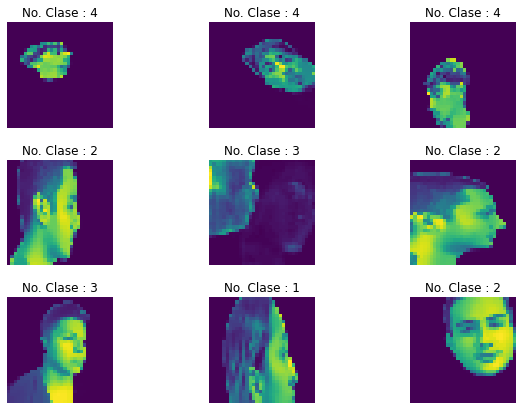

In [178]:
def mostrar_imagenes_aleatorias(imagenes, etiquetas):
    """Permite imprimir randómicamente una imagen por cada clase con título y sus dimensiones.

    Argumentos:
        ruta_imagenes (str): Una cadena de texto que identifica el.

    Returna:
        No retorna nada
    """
    '''Se establece las dimensiones de contendor del gráfico'''  
    plt.figure(1 , figsize = (10 , 7))
    '''Se establece una variable contador'''
    n = 0 
    '''Se genera un ciclo que iterará cada imagen'''
    for iterador in range(9):
        '''Se aumentan en una uniadad del contador'''
        n += 1 
        '''Se genera un número aleatorio'''
        numero_aleatario = np.random.randint(0 , imagenes.shape[0] , 1)
        '''Se establece la distribución del contenedor gráfico'''
        plt.subplot(3 , 3 , n)
        '''Se ajusta la separación de altura y anchura'''
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        '''Se muestra una imagen de forma aletoria'''
        plt.imshow(imagenes[numero_aleatario[0]])
        '''Se genera el título de cada imagen'''
        plt.title('No. Clase : {}'.format(etiquetas[numero_aleatario[0]]))
        '''Se deshabilita la visualización de los ejes'''
        plt.axis('off')
    '''Se muestra el contenedor gráfico'''
    plt.show()
'''Se llama al método generado anteriormente'''
mostrar_imagenes_aleatorias(imagenes, etiquetas)

## Preparando la data para la generación del modelo CNN

In [179]:
'''Barajando los datos'''
'''Primer paso'''
numero_aleatorio = np.arange(imagenes.shape[0])
print("Valores antes de barajear = ",numero_aleatorio)

'''Barajando todos los valores igualmente espaciados en la lista almacenada aleatoriamente'''
np.random.seed(semilla_aleatoria)
np.random.shuffle(numero_aleatorio)
print("\nValores después de barajear = ",numero_aleatorio)

Valores antes de barajear =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]

Valores después de barajear =  [135  90 145 147  60  37  26   3  75   9  25  73  98  94  39  81  31  55
 101  47  28  27 111  20 118  89  43 144   8 137 112 138  23  67  79  82
  76  45 109   7  17 100  86  44 103  68   6  69  35 130  70  51  10  53
 133 136 110 140  80  21 134  38   2  84 116  11  57  78 122  96  97  36
  32 148  88  14 107  83 106  95  48 

In [180]:
'''Segundo paso'''
'''Barajendo las imágenes y los datos de las etiquetas correspondientes en las dos listas'''
imagenes = imagenes[numero_aleatorio]
etiquetas = etiquetas[numero_aleatorio]

print("Dimensiones de la imagen después de barajear = ",imagenes.shape,"\nDimensiones de " +
    "las etiquetas después de barajear = ",etiquetas.shape)

Dimensiones de la imagen después de barajear =  (150, 32, 32) 
Dimensiones de las etiquetas después de barajear =  (150,)


In [181]:
'''Se modifica el tipo de dato para imágenes y etiquetas'''
imagenes = imagenes.astype(np.float32)
etiquetas = etiquetas.astype(np.int32)
imagenes = imagenes/255
print("Dimensión de las imágenes después de normalizar= ",imagenes.shape)

Dimensión de las imágenes después de normalizar=  (150, 32, 32)


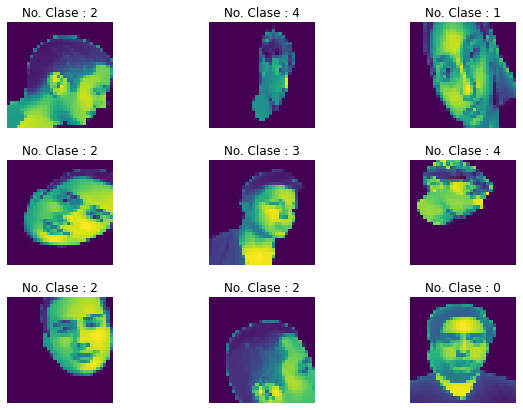

In [182]:
'''Se llama al método que imprime imágenes aleatorias'''
mostrar_imagenes_aleatorias(imagenes, etiquetas)

## Se divide el dataset en entrenamiento y prueba

In [183]:
'''Se divide el dataset en entrenamiento y prueba (20%)'''
train_fotos, test_fotos, train_etiquetas, test_etiquetas = train_test_split(imagenes, etiquetas,
                                                                 test_size = 0.2, random_state = semilla_aleatoria)

'''Se imprime las dimensiones para cada división realizada'''
print("Dimensión train_fotos = ",train_fotos.shape)
print("Dimensión train_etiquetas= ",train_etiquetas.shape)
print("\nDimensión test_fotos = ",test_fotos.shape)
print("Dimensión test_etiquetas = ",test_etiquetas.shape)

Dimensión train_fotos =  (120, 32, 32)
Dimensión train_etiquetas=  (120,)

Dimensión test_fotos =  (30, 32, 32)
Dimensión test_etiquetas =  (30,)


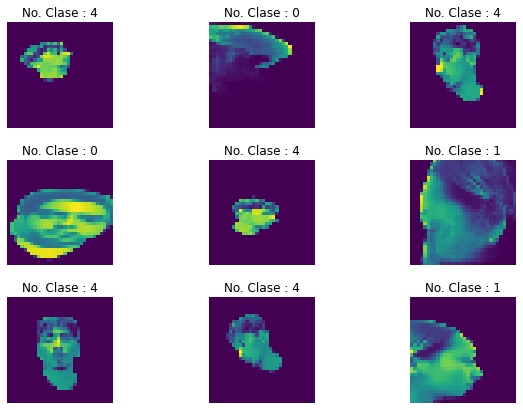

In [184]:
'''Se llama al método que imprime imágenes aleatorias'''
mostrar_imagenes_aleatorias(train_fotos, train_etiquetas)

# Arquitectura de LeNet

## Cuarto experimento

In [199]:
'''Se genera un modelo secuencial'''
modelo4 = Sequential()
'''Se añade la primera capa de convulución'''
modelo4.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
modelo4.add(layers.AveragePooling2D())
'''Se añade la segunda capa de convulución'''
modelo4.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
modelo4.add(layers.AveragePooling2D())
'''Se unifican las capas'''
modelo4.add(layers.Flatten())
'''Las capa de densidad'''
modelo4.add(layers.Dense(units=120, activation='relu'))
modelo4.add(layers.Dense(units=84, activation='relu'))
'''Salida'''
modelo4.add(layers.Dense(units=10, activation = 'softmax'))

In [200]:
'''Se compila el modelo'''
modelo4.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

In [201]:
'''Se entra al modelo'''
modelo4.fit(train_fotos, train_etiquetas, epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 12ms/step - loss: 14.3652 - accuracy: 0.1000
Epoch 2/20
4/4 [==============================] - 0s 17ms/step - loss: 4.1759 - accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 0s 17ms/step - loss: 2.9403 - accuracy: 0.3083
Epoch 4/20
4/4 [==============================] - 0s 14ms/step - loss: 1.7685 - accuracy: 0.4083
Epoch 5/20
4/4 [==============================] - 0s 18ms/step - loss: 1.4251 - accuracy: 0.4417
Epoch 6/20
4/4 [==============================] - 0s 15ms/step - loss: 1.1766 - accuracy: 0.5750
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 0.9275 - accuracy: 0.7083
Epoch 8/20
4/4 [==============================] - 0s 15ms/step - loss: 0.8005 - accuracy: 0.7417
Epoch 9/20
4/4 [==============================] - 0s 14ms/step - loss: 0.6789 - accuracy: 0.7750
Epoch 10/20
4/4 [==============================] - 0s 14ms/step - loss: 0.5511 - accuracy: 0.8583
Epoch 11/20
4/4 [===========

In [202]:
'''Se evalúa la exactitud del  modelo'''
perdida, exactitud_cuarto = modelo4.evaluate(test_fotos, test_etiquetas)

print(perdida,exactitud_cuarto)

1/1 [==============================] - 0s 354ms/step - loss: 1.8673 - accuracy: 0.4333
1.867288589477539 0.4333333373069763


### Predecir valores con el modelo entrenado

In [203]:
'''Se establece la predicción del modelo'''
pred_cuarto = modelo4.predict(test_fotos)
pred_cuarto.shape
print(perdida,exactitud_cuarto)

1/1 [==============================] - 0s 151ms/step


(30, 10)

1.867288589477539 0.4333333373069763


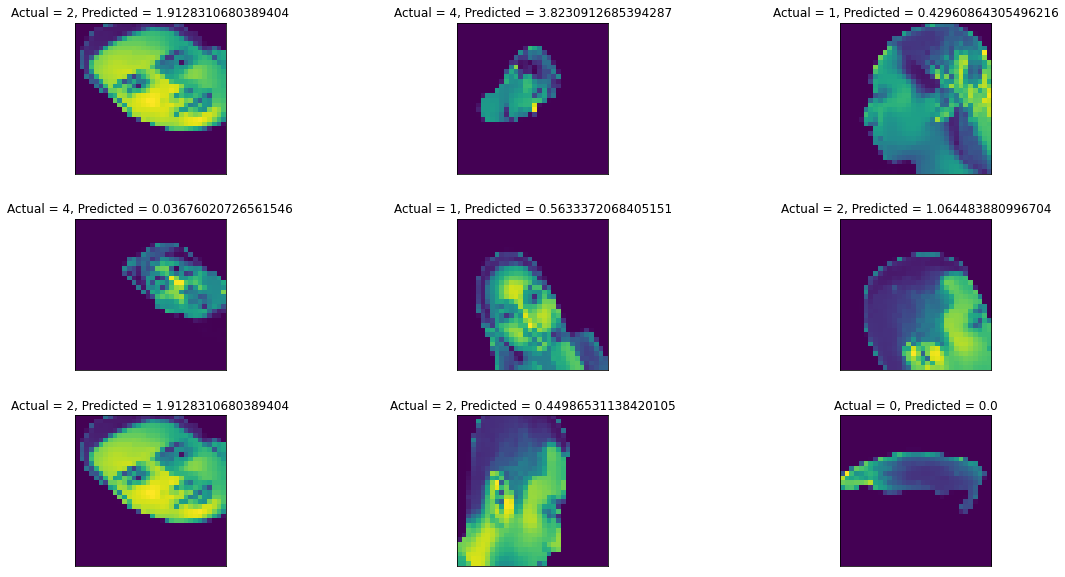

In [204]:
'''Se iprimn nueve imagenes de forma aleatoria'''
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_fotos.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_fotos[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_etiquetas[r[0]] ,
             test_etiquetas[r[0]]*pred_cuarto[r[0]][test_etiquetas[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()